Import packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import datetime as dt

Import data

In [2]:
df = pds.read_csv('../../bus203_all_labelled.csv')

One hot encode segments, normalize columns and create final dataset

In [3]:
# Normalize timestamp
df['timestamp'] = df['timestamp'].str[11:13].astype(int)/48

# Normalize time since journey start
df['time_since_journey_start'] = (df['time_since_journey_start']-df['time_since_journey_start'].mean())/df['time_since_journey_start'].std()

# Make segments categorical
dataset = pds.get_dummies(df['segment_number'])

# Combine segments, timestamps and time from journey start
dataset['timestamp'] = df['timestamp']
dataset['time_since_journey_start'] = df['time_since_journey_start']


Divide training and test data, 80% training data

In [4]:
msk = np.random.rand(len(df))<0.8
train_input = dataset[msk]
test_input = dataset[~msk]

train_labels = df['label'][msk]
test_labels = df['label'][~msk]

Build model

In [5]:
model = keras.Sequential([
	keras.layers.Dense(13, activation=tf.nn.relu, input_shape=(train_input.shape[1],)),
	keras.layers.Dense(1)
	])

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
None


Fit model

In [6]:
EPOCHS=5
model.fit(train_input.values, train_labels.values, epochs = EPOCHS)

Epoch 1/5
2772356/2772356 [==============================] - 63s 23us/step - loss: 1194.3219 - mean_absolute_error: 20.7923
Epoch 2/5
2772356/2772356 [==============================] - 64s 23us/step - loss: 846.9594 - mean_absolute_error: 18.3704
Epoch 3/5
2772356/2772356 [==============================] - 64s 23us/step - loss: 844.9304 - mean_absolute_error: 18.3600
Epoch 4/5
2772356/2772356 [==============================] - 64s 23us/step - loss: 844.0934 - mean_absolute_error: 18.3539
Epoch 5/5
2772356/2772356 [==============================] - 63s 23us/step - loss: 843.7205 - mean_absolute_error: 18.3473


Evaluate model

In [7]:
model.evaluate(test_input.values, test_labels.values)

692481/692481 [==============================] - 9s 12us/step 


[842.986433626567, 18.394361713134444]

Plot predictions

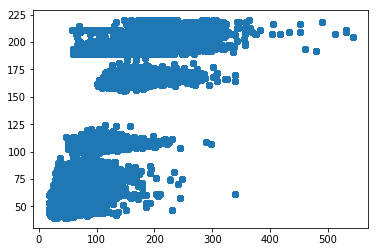

In [8]:
test_predictions = model.predict(test_input.values)
plt.scatter(test_labels.values, test_predictions)
plt.show()